In [1]:
#Importamos las librerias 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
datos=pd.read_csv("CleanedData.csv", delimiter="," )
datos.head()


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [4]:
#Variables predictorias 
x= datos.iloc[:,0:25]
#Variable a predecir 
y = datos.iloc[:,26]
#Mostramos las primeras 5 filas
x.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No
0,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,1,0,0,0,0,1
2,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,1,0,0,0,1,0
3,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,1,0,0,0,0
4,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,1,0,0,0,1


In [5]:
#X_train y y_train para entrenamiento 
#y_Test y y_test para prueba 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
#Llamamos al constructor del árbol de desición 
arbol= DecisionTreeClassifier(max_depth=4)
#entrenamos nuestro modelo 
arbol_virus=arbol.fit(x_train,y_train)

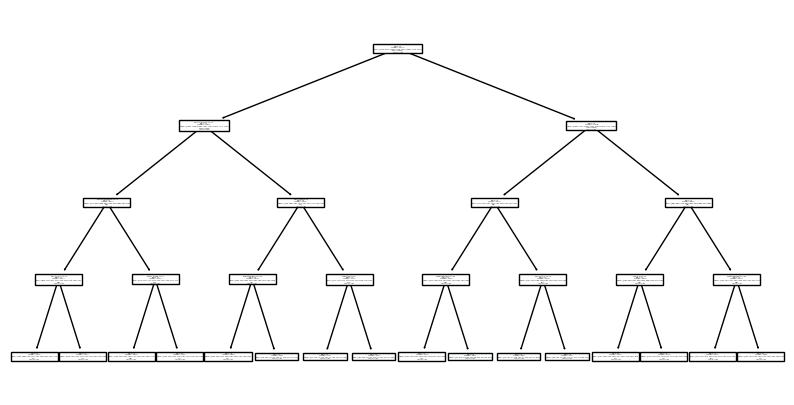

In [16]:
from  matplotlib import pyplot as plt
from sklearn import tree 
fig=plt.figure(figsize=(10,5)) #Indicamos dimensiones al gráfico. 
tree.plot_tree(arbol_virus,feature_names= list(x.columns.values),class_names=list(y.values), filled=True)
plt.show()


In [17]:
fig.savefig("Arbol de desicion.png")

In [19]:
Y_pred = arbol_virus.predict(x_test)

Y_pred

array(['Italy', 'China', 'Republic of Korean', ..., 'Iran', 'UAE',
       'Italy'], dtype=object)

In [20]:
from sklearn.metrics import confusion_matrix
Matriz_de_confusion = confusion_matrix(y_test,Y_pred)
Matriz_de_confusion

array([[1375,    0, 1557, 1011,  568,   57,  580,  795,   78, 1955],
       [1513,    0, 1485,  937,  623,   60,  537,  763,  101, 1919],
       [1521,    0, 1438,  959,  553,   47,  570,  817,   94, 1880],
       [1563,    0, 1490,  890,  559,   54,  509,  788,   80, 1989],
       [1435,    0, 1607,  978,  495,   70,  540,  793,   81, 1980],
       [1488,    0, 1482,  959,  540,   44,  543,  761,   88, 1952],
       [1489,    0, 1572,  952,  585,   57,  475,  756,   86, 1936],
       [1502,    0, 1442,  977,  574,   60,  541,  685,   82, 2043],
       [1525,    0, 1532,  987,  586,   48,  580,  768,   76, 1885],
       [1512,    0, 1569,  989,  535,   55,  499,  768,  113, 1808]],
      dtype=int64)

In [21]:
import numpy as np
precision_Global = np.sum(Matriz_de_confusion.diagonal())/np.sum(Matriz_de_confusion)
precision_Global

0.09199494949494949